# Predicción sobre AL2-FIUNA


---


Estudiantes:

*   Marcos Ibañez
*   Hugo Melgarejo



# Importamos las librerias necesarias




In [ ]:
#Importamos las librerias de pandas,numpy,matplotlib y sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
import seaborn as sns
from math import ceil
#Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Importamos nuestra base de datos desde Github

In [ ]:
url = 'https://raw.githubusercontent.com/diegostaPy/cursoIA/main/datosRendimiento/datosfiltrados.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

ix   Id  danho  ciclo  ...  Primer.Rec Segundo.Rec Nota.Final  id_anony
0  135020  503   2017      1  ...           0           0        NaN   es_1444
1  135021  504   2017      1  ...           0           0        NaN   es_4238
2  135022  505   2017      1  ...           0           0  1F-1,2F-2   es_4245
3  135023  506   2017      1  ...           0           0        NaN   es_4967
4  135024  507   2017      1  ...           0           0     3F-C-3    es_414

[5 rows x 20 columns]

# Realizamos el pre-procesamiento de los datos

Reemplazamos la entrada aprobado que tiene valores S y N a 1 y 0, para realizar la predicción.

In [ ]:
df['Aprobado'] = df['Aprobado'].replace(['S','N'],[1,0])
df.head()

ix   Id  danho  ciclo  ...  Primer.Rec Segundo.Rec Nota.Final  id_anony
0  135020  503   2017      1  ...           0           0        NaN   es_1444
1  135021  504   2017      1  ...           0           0        NaN   es_4238
2  135022  505   2017      1  ...           0           0  1F-1,2F-2   es_4245
3  135023  506   2017      1  ...           0           0        NaN   es_4967
4  135024  507   2017      1  ...           0           0     3F-C-3    es_414

[5 rows x 20 columns]

Separamos los campos referentes a la materia de interes.

In [ ]:
df = df[df['Asignatura'] == 'ALGEBRA LINEAL 2']
df.head()

ix   Id  danho  ciclo  ...  Primer.Rec Segundo.Rec     Nota.Final  id_anony
451  135471  954   2017      1  ...           0           0            NaN   es_4244
452  135472  955   2017      1  ...           0           0            NaN   es_1696
453  135473  956   2017      1  ...           0           0            NaN   es_4238
454  135474  957   2017      1  ...           0           0            NaN   es_4967
455  135475  958   2017      1  ...           0           0  2F-C-1,3F-C-1   es_4554

[5 rows x 20 columns]

In [ ]:
df = df[['Primer.Par','Segundo.Par','Aprobado']]
df

Primer.Par  Segundo.Par  Aprobado
451             0            0         0
452             4           19         0
453             3            0         0
454             3            1         0
455             4           19         0
...           ...          ...       ...
15862           4            0         0
15863          18           29         1
15864           7            0         0
15865           7           18         0
15866           6            0         0

[2584 rows x 3 columns]

A partir de ahora separamos los datos de interes como datos y etiquetas.

Datos
*   Primer Parcial
*   Segundo Parcial


Etiquetas:

*   Aprobado





In [ ]:
X = df[['Primer.Par','Segundo.Par']].values
Y = df[['Aprobado']].values

Ralizamos un gráfico para observar la situación y notamos que es posible realizar una frontera para clasificar a aprobados y reprobados, aunque la misma no será exacta siempre.

<function matplotlib.pyplot.show>

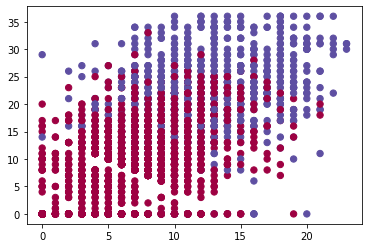

In [ ]:
plt.scatter(X[:,0],X[:,1],s=40,c=Y,cmap=plt.cm.Spectral)
plt.show


Separamos los datos en entrenamiento y test.

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 1234,shuffle = True)


Escalamos los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Creamos la red neuronal con Keras

Ahora creamos la red neuronal.

In [ ]:
model = Sequential()
model.add(Dense(2, activation='linear',input_shape = (2,),name = "Capa_de_Entrada"))
model.add(Dense(20,activation='relu', name="Capa_Oculta"))
model.add(Dense(1,activation = 'sigmoid',name = "Capa_de_Salida"))

Configuramos el modelo

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_de_Entrada (Dense)      (None, 2)                 6         
_________________________________________________________________
Capa_Oculta (Dense)          (None, 20)                60        
_________________________________________________________________
Capa_de_Salida (Dense)       (None, 1)                 21        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1500
52/52 [==============================] - 1s 10ms/step - loss: 0.6207 - val_loss: 0.5344
Epoch 2/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.5255 - val_loss: 0.4643
Epoch 3/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.4694 - val_loss: 0.4273
Epoch 4/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.4481 - val_loss: 0.4055
Epoch 5/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.4459 - val_loss: 0.3935
Epoch 6/1500
52/52 [==============================] - 0s 3ms/step - loss: 0.4529 - val_loss: 0.3860
Epoch 7/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.4275 - val_loss: 0.3803
Epoch 8/1500
52/52 [==============================] - 0s 3ms/step - loss: 0.4329 - val_loss: 0.3757
Epoch 9/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.4131 - val_loss: 0.3725
Epoch 10/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.4074 - val_loss: 0.371

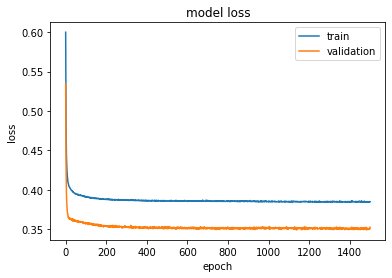

In [ ]:
history = model.fit(X_train, Y_train, epochs=1500 , batch_size=32, verbose=1, validation_split=0.2)
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Comenzamos a entrenar el modelo

Evaluamos el error del modelo

In [ ]:
print(model.evaluate(X, Y))
print(model.metrics_names)

81/81 [==============================] - 0s 2ms/step - loss: 14.1675
14.167478561401367
['loss']


Imprimimos la matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report  
predictions = model.predict(X_test)

predict_label = predictions.reshape(-1).round()

print('Cantidad de predicciones = {} \n'.format(predict_label.shape))

cf_matrix = confusion_matrix(Y_test, predict_label)
print(cf_matrix)

Cantidad de predicciones = (517,) 

[[279  35]
 [ 37 166]]


Graficamos la matriz de confusión.

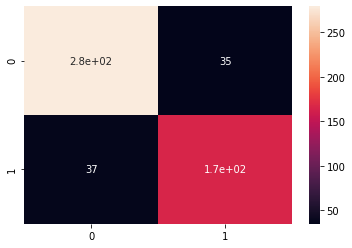

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

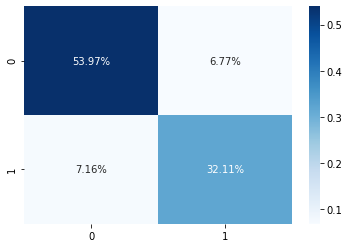

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Creamos el reporte del modelo

In [ ]:
report = classification_report(Y_test, predict_label)  
print(report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       314
           1       0.83      0.82      0.82       203

    accuracy                           0.86       517
   macro avg       0.85      0.85      0.85       517
weighted avg       0.86      0.86      0.86       517



Prueba


In [ ]:
X_new = pd.DataFrame({'Primer.Par': [24], 'Segundo.Par': [36]})
model.predict(X_new)[0][0]

1.0